In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

C:\Users\thrfarokr\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2

In [4]:
df.sample(5)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
633,535154130,20,RL,66.0,9240,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,149500
1431,907126030,20,RL,65.0,9750,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,155000
505,528390210,60,RL,NaN,29959,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,248000
2760,906394010,60,RL,91.0,10984,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,209700
1219,534451080,20,RL,NaN,6627,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,72500


In [5]:
df.drop('PID',axis=1,inplace=True)

In [6]:
missing_value = df.isnull().sum().sort_values(ascending=False).to_frame()
missing_value

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Fireplace Qu,1422
Lot Frontage,490
Garage Cond,159
Garage Qual,159
Garage Yr Blt,159
Garage Finish,159


In [7]:
def missing_percentage(x):
    null_percent = round((100 * df.isnull().sum()) / len(df),2)
    null_percent = null_percent[null_percent > 0].sort_values(ascending = False).to_frame()
    
    return(null_percent)

In [8]:
null_percent = missing_percentage(df)
null_percent

,0
Pool QC,99.56
Misc Feature,96.38
Alley,93.24
Fence,80.48
Fireplace Qu,48.53
Lot Frontage,16.72
Garage Yr Blt,5.43
Garage Cond,5.43
Garage Qual,5.43
Garage Finish,5.43


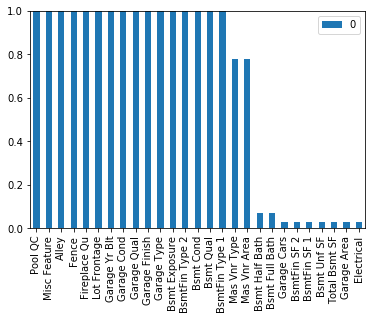

In [9]:
null_percent.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [10]:
null_percent[null_percent < 1]

,0
Pool QC,NaN
Misc Feature,NaN
Alley,NaN
Fence,NaN
Fireplace Qu,NaN
Lot Frontage,NaN
Garage Yr Blt,NaN
Garage Cond,NaN
Garage Qual,NaN
Garage Finish,NaN


In [11]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [12]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [13]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [14]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [15]:
df[df['BsmtFin SF 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [16]:
df[df['BsmtFin SF 2'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [17]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [18]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [19]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [20]:
df[df['Mas Vnr Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [21]:
df[df['Mas Vnr Type'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [22]:
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [23]:
df[df['Electrical'].isnull()]['Total Bsmt SF']

1577    384.0
Name: Total Bsmt SF, dtype: float64

In [24]:
df[df['Electrical'].isnull()]['Bsmt Unf SF']

1577    384.0
Name: Bsmt Unf SF, dtype: float64

In [25]:
df[df['Electrical'].isnull()]['BsmtFin SF 1']

1577    0.0
Name: BsmtFin SF 1, dtype: float64

In [26]:
df[df['Electrical'].isnull()]['BsmtFin SF 2']

1577    0.0
Name: BsmtFin SF 2, dtype: float64

In [27]:
df[df['Electrical'].isnull()]['Garage Cars']

1577    2.0
Name: Garage Cars, dtype: float64

In [28]:
df[df['Electrical'].isnull()]['Bsmt Full Bath']

1577    0.0
Name: Bsmt Full Bath, dtype: float64

In [29]:
df[df['Electrical'].isnull()]['Bsmt Half Bath']

1577    0.0
Name: Bsmt Half Bath, dtype: float64

In [30]:
df[df['Electrical'].isnull()]['Mas Vnr Area']

1577    0.0
Name: Mas Vnr Area, dtype: float64

In [31]:
df[df['Electrical'].isnull()]['Mas Vnr Type']

1577    None
Name: Mas Vnr Type, dtype: object

In [32]:
df.dropna(axis=0,subset=['Electrical','Garage Area'],inplace=True)

In [33]:
null_percent = missing_percentage(df)
null_percent[null_percent < 1]

,0
Pool QC,NaN
Misc Feature,NaN
Alley,NaN
Fence,NaN
Fireplace Qu,NaN
Lot Frontage,NaN
Garage Yr Blt,NaN
Garage Finish,NaN
Garage Cond,NaN
Garage Qual,NaN


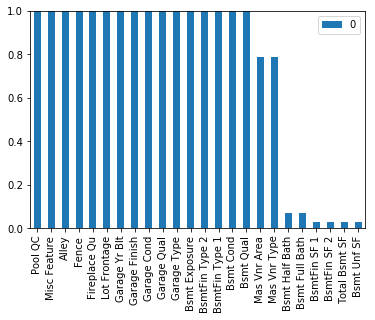

In [34]:
null_percent.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [35]:
#BSMT Numeric Column ------> fillna 0
basement_numeric_items = ['Bsmt Unf SF','Total Bsmt SF','BsmtFin SF 2','BsmtFin SF 1','Bsmt Full Bath','Bsmt Half Bath']

df[basement_numeric_items] = df[basement_numeric_items].fillna(0)

#BSMT String Column ------> fillna 'None'
basement_string_items = ['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']

df[basement_string_items] = df[basement_string_items].fillna('None')

In [36]:
null_percent = missing_percentage(df)
null_percent[null_percent < 1]

,0
Pool QC,NaN
Misc Feature,NaN
Alley,NaN
Fence,NaN
Fireplace Qu,NaN
Lot Frontage,NaN
Garage Cond,NaN
Garage Qual,NaN
Garage Finish,NaN
Garage Yr Blt,NaN


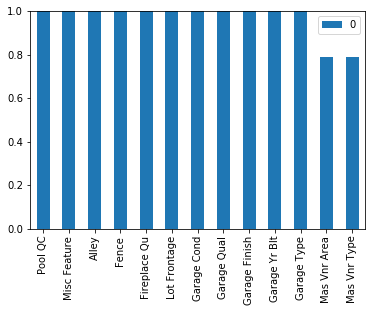

In [37]:
null_percent.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [38]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [39]:
null_percent = missing_percentage(df)
null_percent[null_percent < 1]

,0
Pool QC,NaN
Misc Feature,NaN
Alley,NaN
Fence,NaN
Fireplace Qu,NaN
Lot Frontage,NaN
Garage Cond,NaN
Garage Qual,NaN
Garage Finish,NaN
Garage Yr Blt,NaN


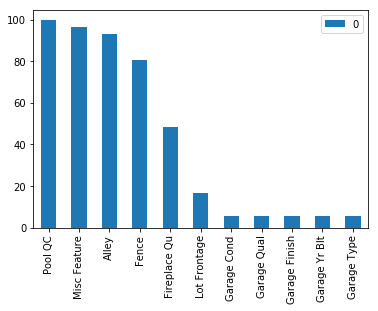

In [40]:
null_percent.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [41]:
garage_string_columns = ['Garage Cond','Garage Qual','Garage Finish','Garage Type']

df[garage_string_columns] = df[garage_string_columns].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

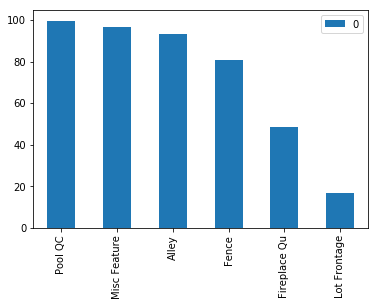

In [42]:
null_percent = missing_percentage(df)
null_percent[null_percent < 1]

null_percent.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [43]:
df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1,inplace=True)

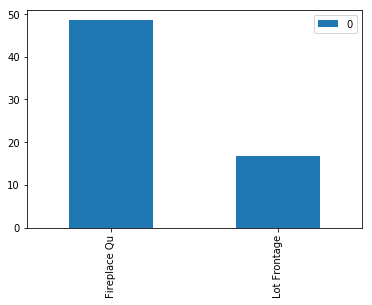

In [44]:
null_percent = missing_percentage(df)
null_percent[null_percent < 1]

null_percent.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [45]:
df['Fireplace Qu'].value_counts()

Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [46]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [47]:
df['Lot Frontage'].describe()

count    2438.000000
mean       69.230927
std        23.371551
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

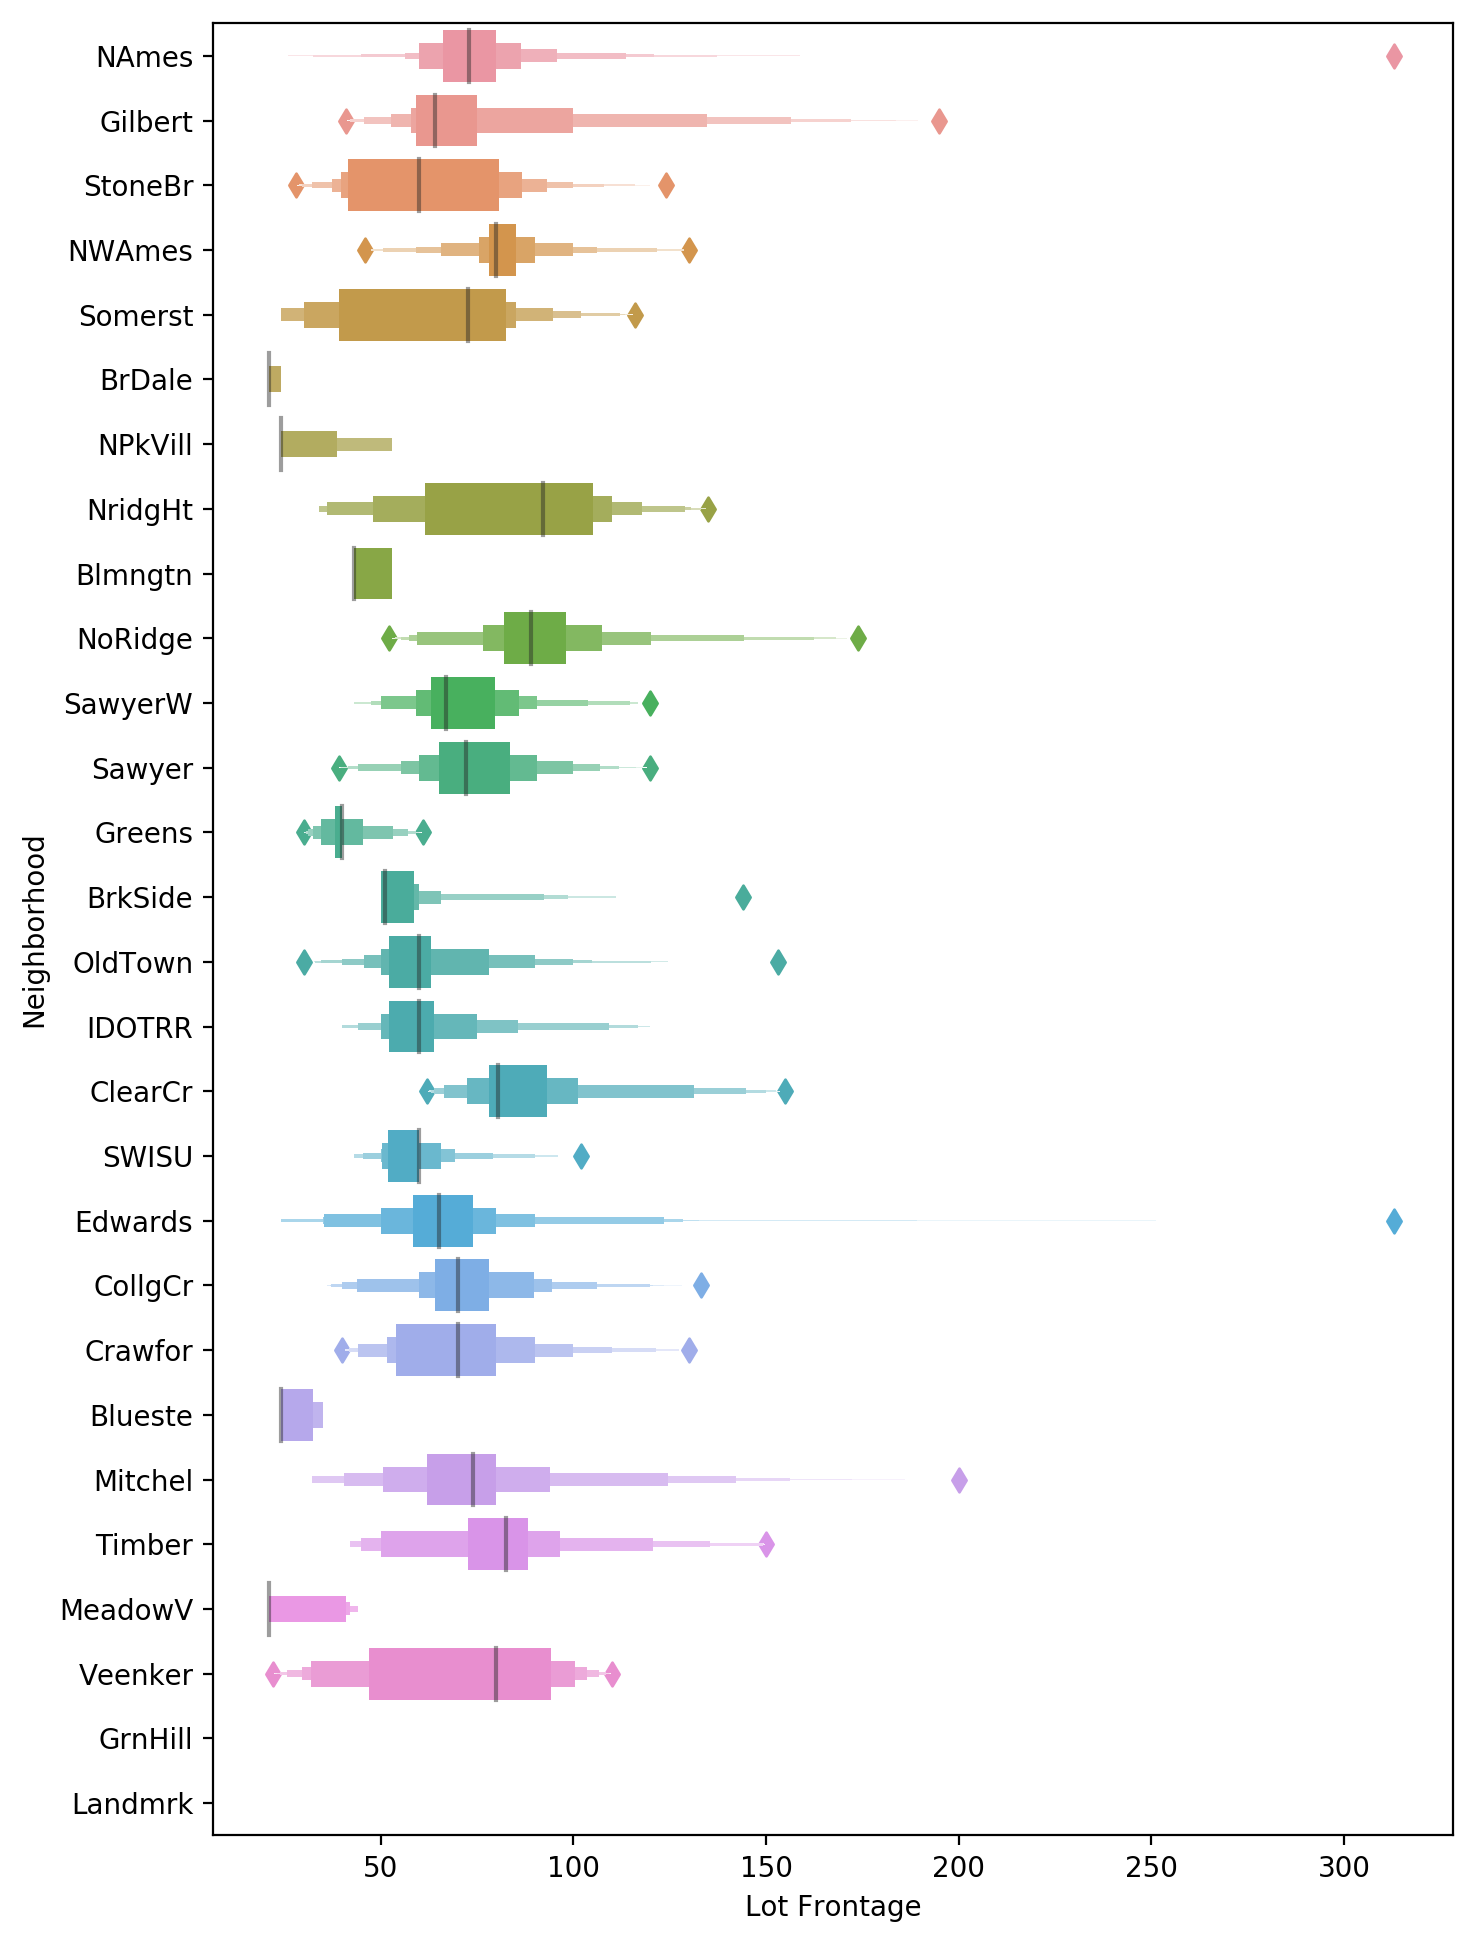

In [48]:
plt.figure(figsize=(8,12),dpi=200)

sns.boxenplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [49]:
df.groupby('Neighborhood')['Lot Frontage'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,20.0,46.900000,4.919350,43.0,43.00,43.0,53.00,53.0
Blueste,10.0,27.300000,5.313505,24.0,24.00,24.0,32.25,35.0
BrDale,30.0,21.500000,1.137147,21.0,21.00,21.0,21.00,24.0
BrkSide,95.0,55.789474,12.722818,50.0,50.00,51.0,58.50,144.0
ClearCr,20.0,88.150000,22.628057,62.0,78.00,80.5,93.25,155.0
CollgCr,220.0,71.336364,15.940401,36.0,64.00,70.0,78.00,133.0
Crawfor,83.0,69.951807,19.141262,40.0,54.00,70.0,80.00,130.0
Edwards,178.0,66.910112,26.372019,24.0,58.25,65.0,74.00,313.0
Gilbert,111.0,74.207207,28.386654,41.0,59.00,64.0,75.00,195.0


In [50]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.mean()))

In [51]:
missing_value = df.isnull().sum().sort_values(ascending=False).to_frame()
missing_value

,0
Lot Frontage,3
SalePrice,0
Bsmt Qual,0
Exterior 1st,0
Exterior 2nd,0
Mas Vnr Type,0
Mas Vnr Area,0
Exter Qual,0
Exter Cond,0
Foundation,0


In [52]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2929
Data columns (total 76 columns):
MS SubClass        2928 non-null int64
MS Zoning          2928 non-null object
Lot Frontage       2928 non-null float64
Lot Area           2928 non-null int64
Street             2928 non-null object
Lot Shape          2928 non-null object
Land Contour       2928 non-null object
Utilities          2928 non-null object
Lot Config         2928 non-null object
Land Slope         2928 non-null object
Neighborhood       2928 non-null object
Condition 1        2928 non-null object
Condition 2        2928 non-null object
Bldg Type          2928 non-null object
House Style        2928 non-null object
Overall Qual       2928 non-null int64
Overall Cond       2928 non-null int64
Year Built         2928 non-null int64
Year Remod/Add     2928 non-null int64
Roof Style         2928 non-null object
Roof Matl          2928 non-null object
Exterior 1st       2928 non-null object
Exterior 2nd      

In [54]:
df.corr()['SalePrice'].sort_values().to_frame()

,SalePrice
Enclosed Porch,-0.128629
Kitchen AbvGr,-0.119857
Overall Cond,-0.101686
MS SubClass,-0.085031
Low Qual Fin SF,-0.037680
Bsmt Half Bath,-0.035864
Yr Sold,-0.030640
Misc Val,-0.015708
BsmtFin SF 2,0.005964
3Ssn Porch,0.032207


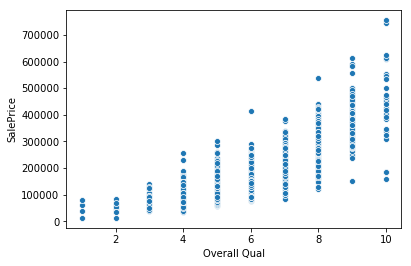

In [55]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

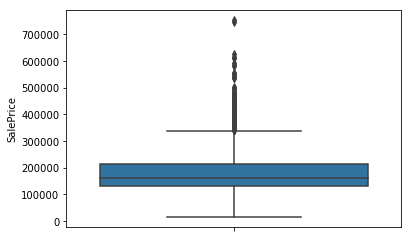

In [56]:
sns.boxplot(y='SalePrice',data=df)

In [57]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['SalePrice'] < (Q1 - 1.5 * IQR)) | (df['SalePrice'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

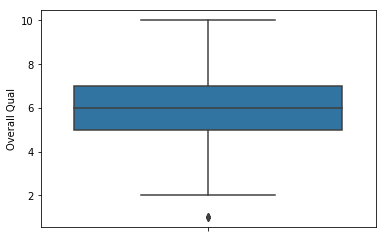

In [58]:
sns.boxplot(y='Overall Qual',data=df)

In [59]:
Q1 = df['Overall Qual'].quantile(0.25)
Q3 = df['Overall Qual'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Overall Qual'] < (Q1 - 1.5 * IQR)) | (df['Overall Qual'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

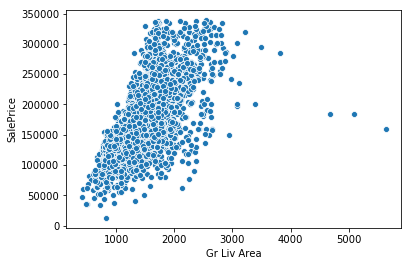

In [60]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

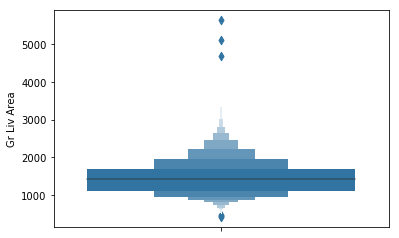

In [61]:
sns.boxenplot(y= 'Gr Liv Area',data=df)

In [62]:
Q1 = df['Gr Liv Area'].quantile(0.25)
Q3 = df['Gr Liv Area'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Gr Liv Area'] < (Q1 - 1.5 * IQR)) | (df['Gr Liv Area'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

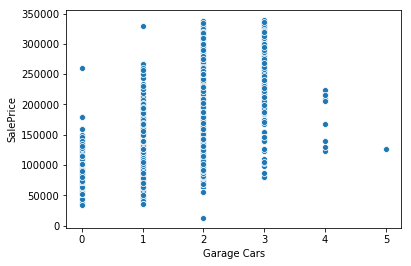

In [63]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)

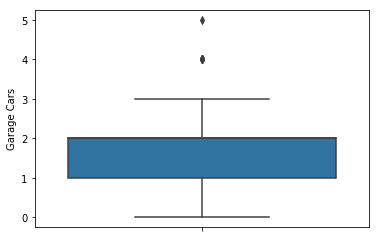

In [64]:
sns.boxplot(y='Garage Cars',data=df)

In [65]:
Q1 = df['Garage Cars'].quantile(0.25)
Q3 = df['Garage Cars'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Garage Cars'] < (Q1 - 1.5 * IQR)) | (df['Garage Cars'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

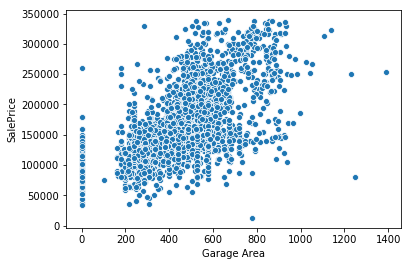

In [66]:
sns.scatterplot(x='Garage Area',y='SalePrice',data=df)

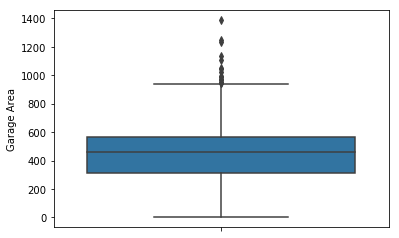

In [67]:
sns.boxplot(y='Garage Area',data=df)

In [68]:
Q1 = df['Garage Area'].quantile(0.25)
Q3 = df['Garage Area'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Garage Area'] < (Q1 - 1.5 * IQR)) | (df['Garage Area'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

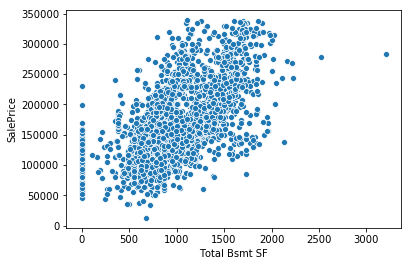

In [69]:
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df)

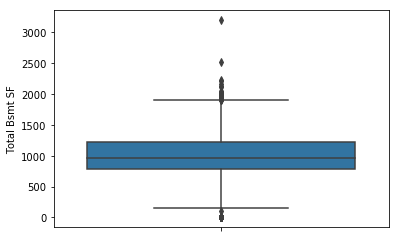

In [70]:
sns.boxplot(y='Total Bsmt SF',data=df)

In [71]:
Q1 = df['Total Bsmt SF'].quantile(0.25)
Q3 = df['Total Bsmt SF'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Total Bsmt SF'] < (Q1 - 1.5 * IQR)) | (df['Total Bsmt SF'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

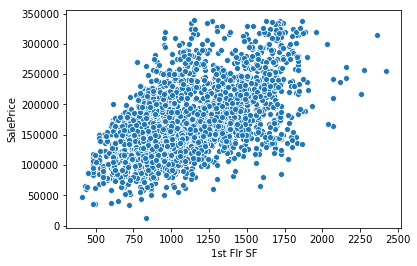

In [72]:
sns.scatterplot(x='1st Flr SF',y='SalePrice',data=df)

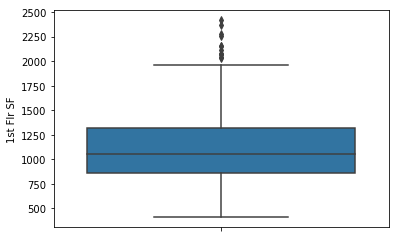

In [73]:
sns.boxplot(y='1st Flr SF',data=df)

In [74]:
Q1 = df['1st Flr SF'].quantile(0.25)
Q3 = df['1st Flr SF'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['1st Flr SF'] < (Q1 - 1.5 * IQR)) | (df['1st Flr SF'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

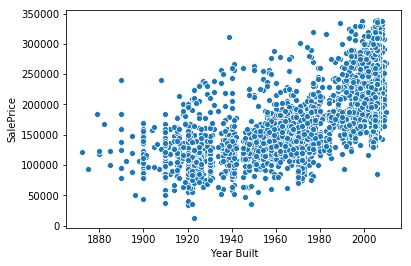

In [75]:
sns.scatterplot(x='Year Built',y='SalePrice',data=df)

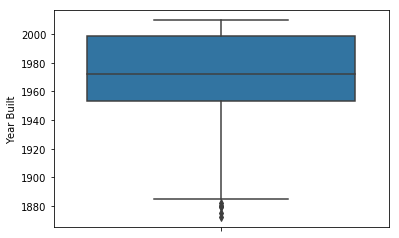

In [76]:
sns.boxplot(y='Year Built',data=df)

In [77]:
Q1 = df['Year Built'].quantile(0.25)
Q3 = df['Year Built'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Year Built'] < (Q1 - 1.5 * IQR)) | (df['Year Built'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

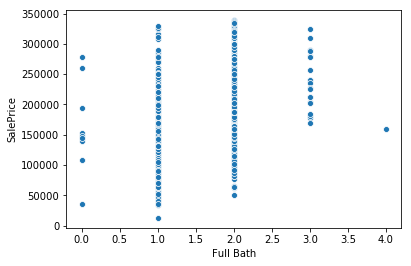

In [78]:
sns.scatterplot(x='Full Bath',y='SalePrice',data=df)

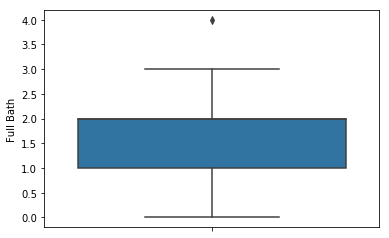

In [79]:
sns.boxplot(y='Full Bath',data=df)

In [80]:
Q1 = df['Year Built'].quantile(0.25)
Q3 = df['Year Built'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Year Built'] < (Q1 - 1.5 * IQR)) | (df['Year Built'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

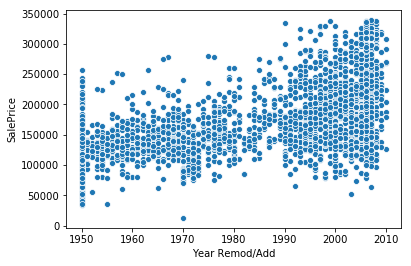

In [81]:
sns.scatterplot(x='Year Remod/Add',y='SalePrice',data=df)

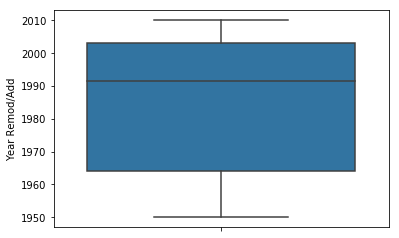

In [82]:
sns.boxplot(y='Year Remod/Add',data=df)

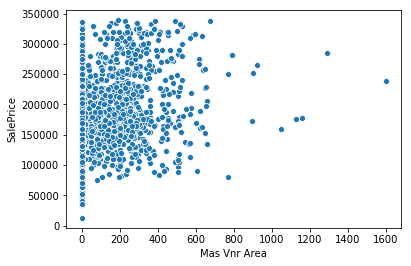

In [83]:
sns.scatterplot(x='Mas Vnr Area',y='SalePrice',data=df)

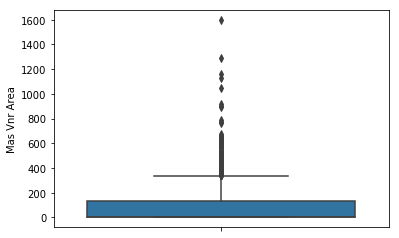

In [84]:
sns.boxplot(y='Mas Vnr Area',data=df)

In [85]:
Q1 = df['Mas Vnr Area'].quantile(0.25)
Q3 = df['Mas Vnr Area'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Mas Vnr Area'] < (Q1 - 1.5 * IQR)) | (df['Mas Vnr Area'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

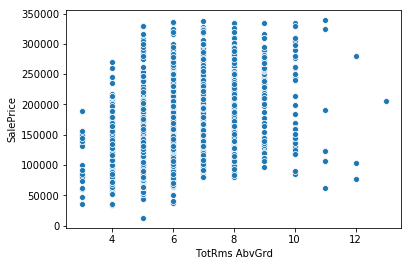

In [86]:
sns.scatterplot(x='TotRms AbvGrd',y='SalePrice',data=df)

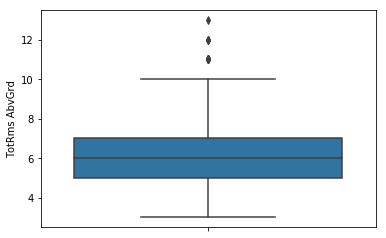

In [87]:
sns.boxplot(y='TotRms AbvGrd',data=df)

In [88]:
Q1 = df['TotRms AbvGrd'].quantile(0.25)
Q3 = df['TotRms AbvGrd'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['TotRms AbvGrd'] < (Q1 - 1.5 * IQR)) | (df['TotRms AbvGrd'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

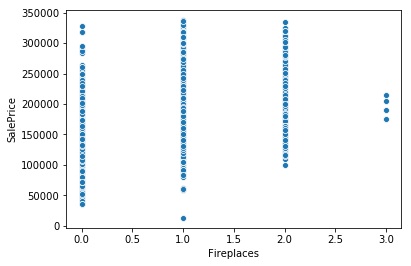

In [89]:
sns.scatterplot(x='Fireplaces',y='SalePrice',data=df)

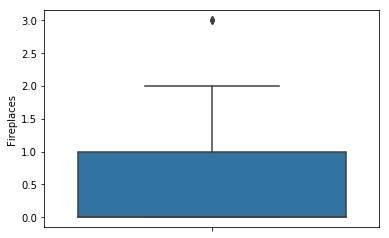

In [90]:
sns.boxplot(y='Fireplaces',data=df)

In [91]:
Q1 = df['Fireplaces'].quantile(0.25)
Q3 = df['Fireplaces'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Fireplaces'] < (Q1 - 1.5 * IQR)) | (df['Fireplaces'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

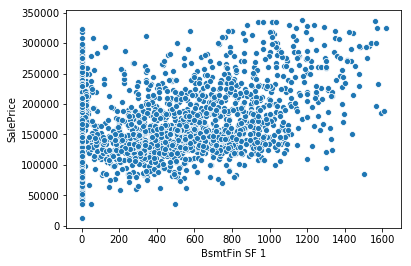

In [92]:
sns.scatterplot(x='BsmtFin SF 1',y='SalePrice',data=df)

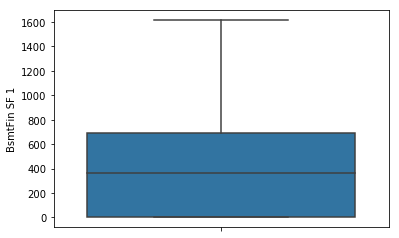

In [93]:
sns.boxplot(y='BsmtFin SF 1',data=df)

In [94]:
Q1 = df['BsmtFin SF 1'].quantile(0.25)
Q3 = df['BsmtFin SF 1'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['BsmtFin SF 1'] < (Q1 - 1.5 * IQR)) | (df['BsmtFin SF 1'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

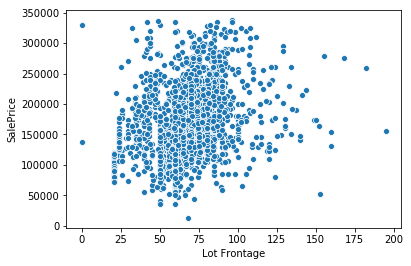

In [95]:
sns.scatterplot(x='Lot Frontage',y='SalePrice',data=df)

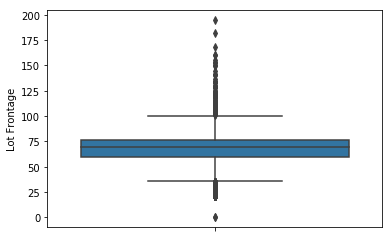

In [96]:
sns.boxplot(y='Lot Frontage',data=df)

In [97]:
Q1 = df['Lot Frontage'].quantile(0.25)
Q3 = df['Lot Frontage'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Lot Frontage'] < (Q1 - 1.5 * IQR)) | (df['Lot Frontage'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

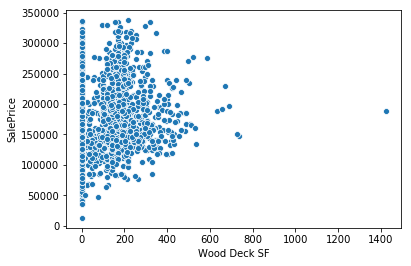

In [98]:
sns.scatterplot(x='Wood Deck SF',y='SalePrice',data=df)

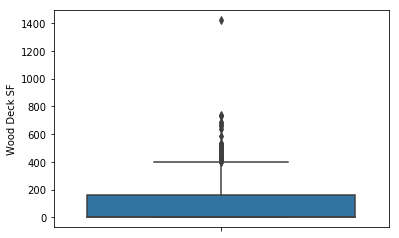

In [99]:
sns.boxplot(y='Wood Deck SF',data=df)

In [100]:
Q1 = df['Wood Deck SF'].quantile(0.25)
Q3 = df['Wood Deck SF'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Wood Deck SF'] < (Q1 - 1.5 * IQR)) | (df['Wood Deck SF'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

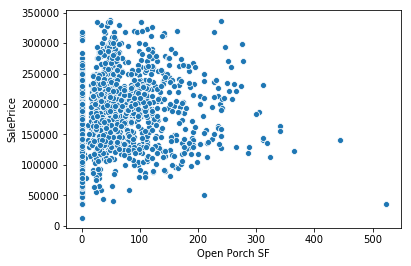

In [101]:
sns.scatterplot(x='Open Porch SF',y='SalePrice',data=df)

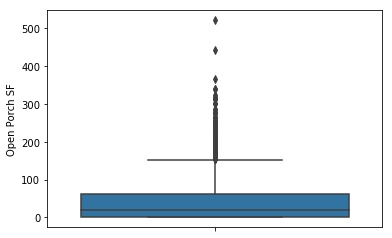

In [102]:
sns.boxplot(y='Open Porch SF',data=df)

In [103]:
Q1 = df['Open Porch SF'].quantile(0.25)
Q3 = df['Open Porch SF'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Open Porch SF'] < (Q1 - 1.5 * IQR)) | (df['Open Porch SF'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

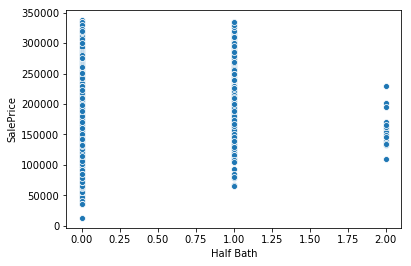

In [104]:
sns.scatterplot(x='Half Bath',y='SalePrice',data=df)

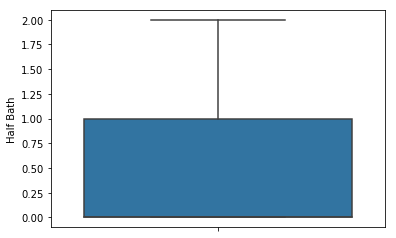

In [105]:
sns.boxplot(y='Half Bath',data=df)

In [106]:
Q1 = df['Half Bath'].quantile(0.25)
Q3 = df['Half Bath'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Half Bath'] < (Q1 - 1.5 * IQR)) | (df['Half Bath'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

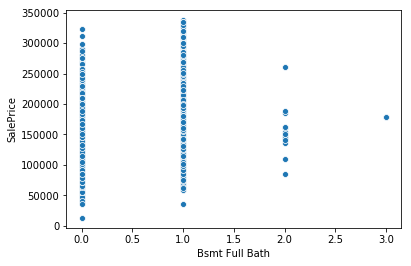

In [107]:
sns.scatterplot(x='Bsmt Full Bath',y='SalePrice',data=df)

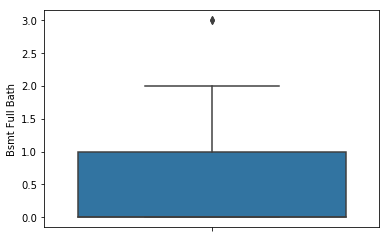

In [108]:
sns.boxplot(y='Bsmt Full Bath',data=df)

In [109]:
Q1 = df['Bsmt Full Bath'].quantile(0.25)
Q3 = df['Bsmt Full Bath'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Bsmt Full Bath'] < (Q1 - 1.5 * IQR)) | (df['Bsmt Full Bath'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

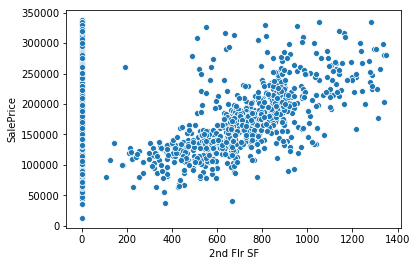

In [110]:
sns.scatterplot(x='2nd Flr SF',y='SalePrice',data=df)

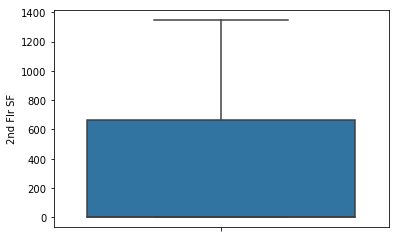

In [111]:
sns.boxplot(y='2nd Flr SF',data=df)

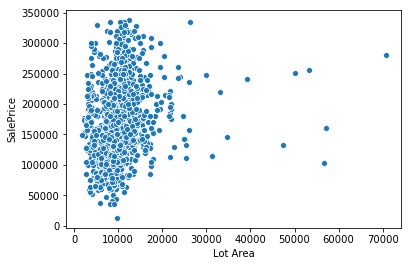

In [112]:
sns.scatterplot(x='Lot Area',y='SalePrice',data=df)

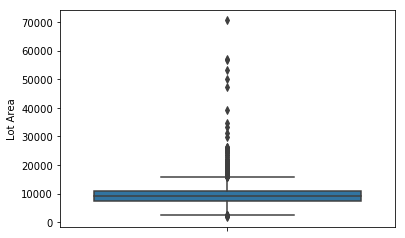

In [113]:
sns.boxplot(y='Lot Area',data=df)

In [114]:
Q1 = df['Lot Area'].quantile(0.25)
Q3 = df['Lot Area'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Lot Area'] < (Q1 - 1.5 * IQR)) | (df['Lot Area'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

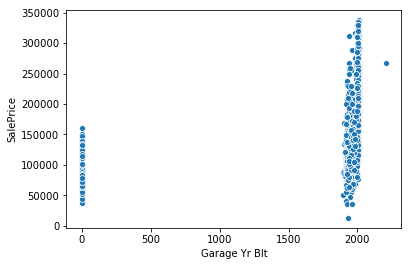

In [115]:
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df)

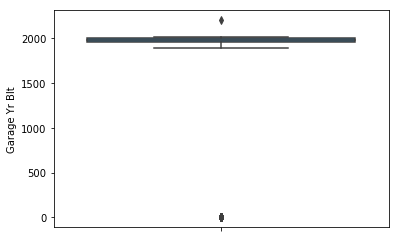

In [116]:
sns.boxplot(y='Garage Yr Blt',data=df)

In [117]:
Q1 = df['Garage Yr Blt'].quantile(0.25)
Q3 = df['Garage Yr Blt'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Garage Yr Blt'] < (Q1 - 1.5 * IQR)) | (df['Garage Yr Blt'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

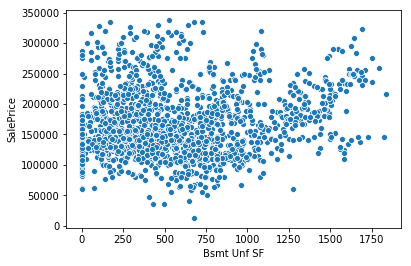

In [118]:
sns.scatterplot(x='Bsmt Unf SF',y='SalePrice',data=df)

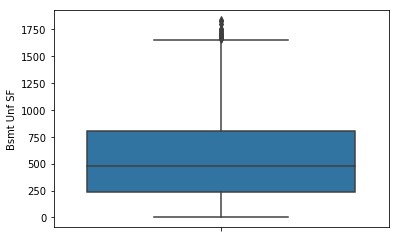

In [119]:
sns.boxplot(y='Bsmt Unf SF',data=df)

In [120]:
Q1 = df['Bsmt Unf SF'].quantile(0.25)
Q3 = df['Bsmt Unf SF'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Bsmt Unf SF'] < (Q1 - 1.5 * IQR)) | (df['Bsmt Unf SF'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

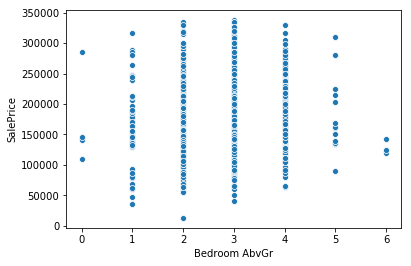

In [121]:
sns.scatterplot(x='Bedroom AbvGr',y='SalePrice',data=df)

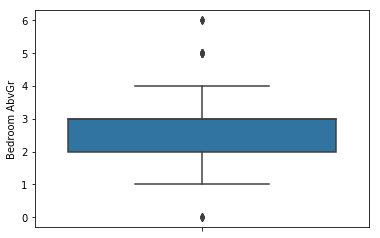

In [122]:
sns.boxplot(y='Bedroom AbvGr',data=df)

In [123]:
Q1 = df['Bedroom AbvGr'].quantile(0.25)
Q3 = df['Bedroom AbvGr'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Bedroom AbvGr'] < (Q1 - 1.5 * IQR)) | (df['Bedroom AbvGr'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

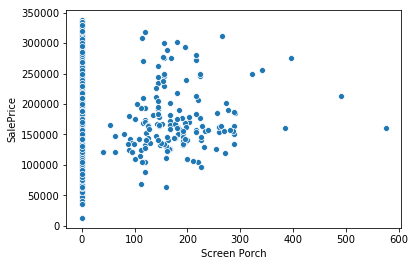

In [124]:
sns.scatterplot(x='Screen Porch',y='SalePrice',data=df)

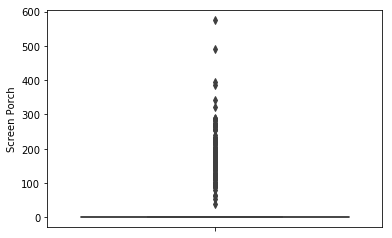

In [125]:
sns.boxplot(y='Screen Porch',data=df)

In [126]:
Q1 = df['Screen Porch'].quantile(0.25)
Q3 = df['Screen Porch'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Screen Porch'] < (Q1 - 1.5 * IQR)) | (df['Screen Porch'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

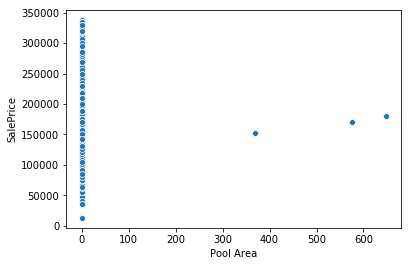

In [127]:
sns.scatterplot(x='Pool Area',y='SalePrice',data=df)

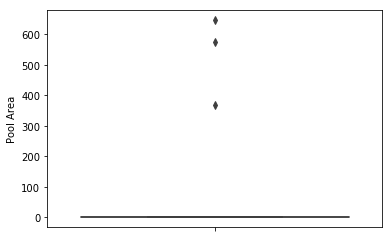

In [128]:
sns.boxplot(y='Pool Area',data=df)

In [129]:
Q1 = df['Pool Area'].quantile(0.25)
Q3 = df['Pool Area'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Pool Area'] < (Q1 - 1.5 * IQR)) | (df['Pool Area'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

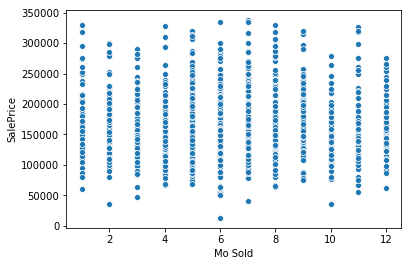

In [130]:
sns.scatterplot(x='Mo Sold',y='SalePrice',data=df)

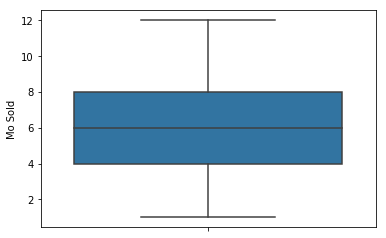

In [131]:
sns.boxplot(y='Mo Sold',data=df)

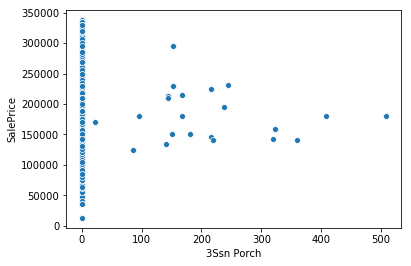

In [132]:
sns.scatterplot(x='3Ssn Porch',y='SalePrice',data=df)

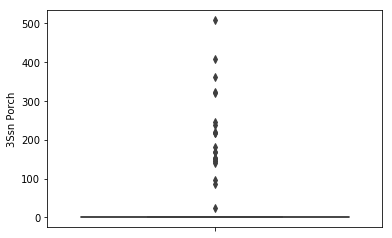

In [133]:
sns.boxplot(y='3Ssn Porch',data=df)

In [134]:
Q1 = df['3Ssn Porch'].quantile(0.25)
Q3 = df['3Ssn Porch'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['3Ssn Porch'] < (Q1 - 1.5 * IQR)) | (df['3Ssn Porch'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

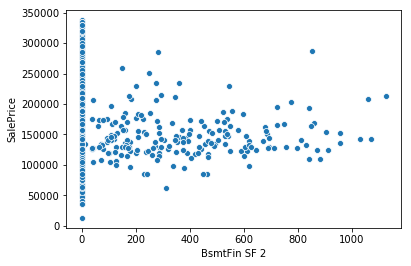

In [135]:
sns.scatterplot(x='BsmtFin SF 2',y='SalePrice',data=df)

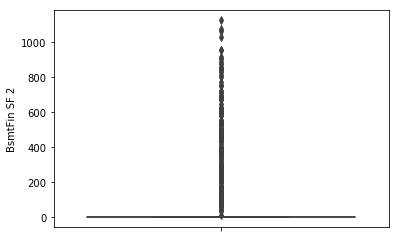

In [136]:
sns.boxplot(y='BsmtFin SF 2',data=df)

In [137]:
Q1 = df['BsmtFin SF 2'].quantile(0.25)
Q3 = df['BsmtFin SF 2'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['BsmtFin SF 2'] < (Q1 - 1.5 * IQR)) | (df['BsmtFin SF 2'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

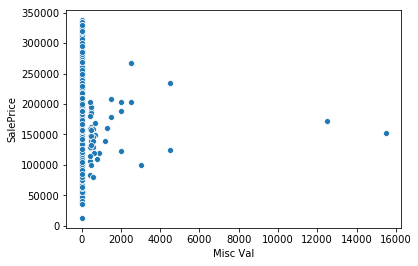

In [138]:
sns.scatterplot(x='Misc Val',y='SalePrice',data=df)

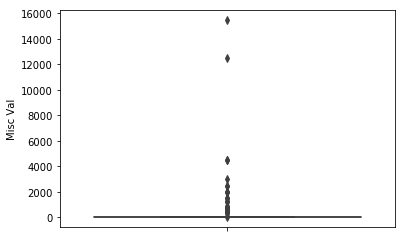

In [139]:
sns.boxplot(y='Misc Val',data=df)

In [140]:
Q1 = df['Misc Val'].quantile(0.25)
Q3 = df['Misc Val'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Misc Val'] < (Q1 - 1.5 * IQR)) | (df['Misc Val'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

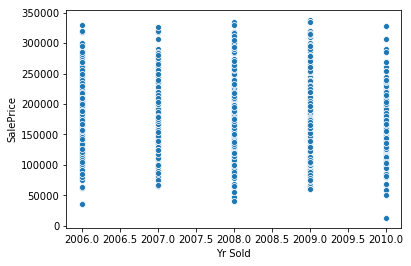

In [141]:
sns.scatterplot(x='Yr Sold',y='SalePrice',data=df)

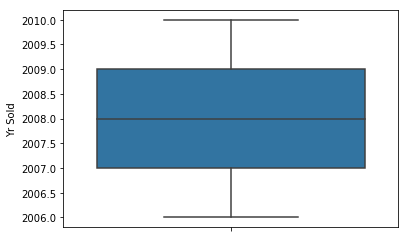

In [142]:
sns.boxplot(y='Yr Sold',data=df)

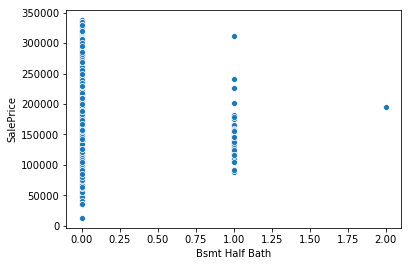

In [143]:
sns.scatterplot(x='Bsmt Half Bath',y='SalePrice',data=df)

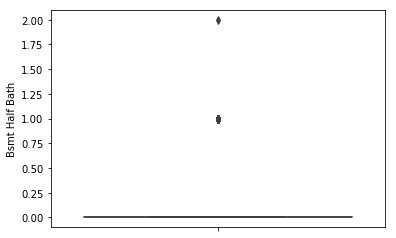

In [144]:
sns.boxplot(y='Bsmt Half Bath',data=df)

In [145]:
Q1 = df['Bsmt Half Bath'].quantile(0.25)
Q3 = df['Bsmt Half Bath'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Bsmt Half Bath'] < (Q1 - 1.5 * IQR)) | (df['Bsmt Half Bath'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

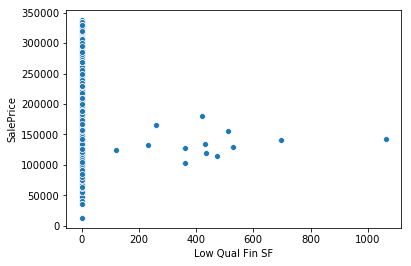

In [146]:
sns.scatterplot(x='Low Qual Fin SF',y='SalePrice',data=df)

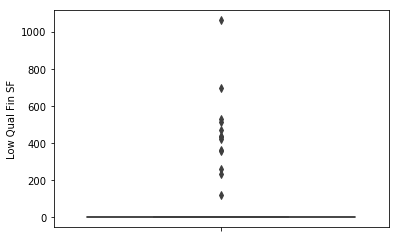

In [147]:
sns.boxplot(y='Low Qual Fin SF',data=df)

In [148]:
Q1 = df['Low Qual Fin SF'].quantile(0.25)
Q3 = df['Low Qual Fin SF'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Low Qual Fin SF'] < (Q1 - 1.5 * IQR)) | (df['Low Qual Fin SF'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

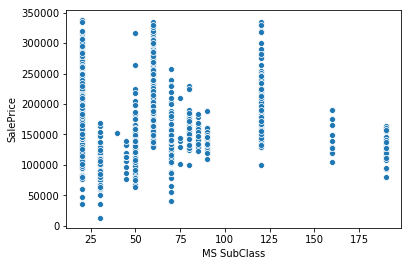

In [149]:
sns.scatterplot(x='MS SubClass',y='SalePrice',data=df)

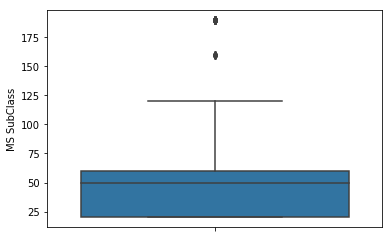

In [150]:
sns.boxplot(y='MS SubClass',data=df)

In [151]:
Q1 = df['MS SubClass'].quantile(0.25)
Q3 = df['MS SubClass'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['MS SubClass'] < (Q1 - 1.5 * IQR)) | (df['MS SubClass'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

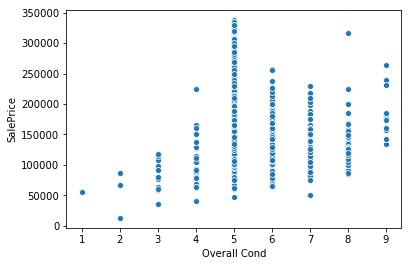

In [152]:
sns.scatterplot(x='Overall Cond',y='SalePrice',data=df)

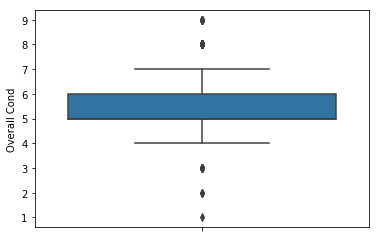

In [153]:
sns.boxplot(y='Overall Cond',data=df)

In [154]:
Q1 = df['Overall Cond'].quantile(0.25)
Q3 = df['Overall Cond'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Overall Cond'] < (Q1 - 1.5 * IQR)) | (df['Overall Cond'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

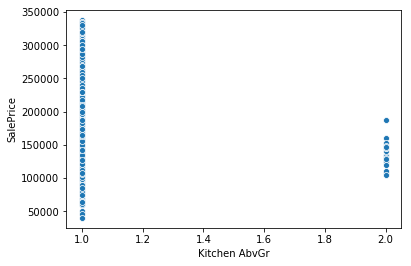

In [155]:
sns.scatterplot(x='Kitchen AbvGr',y='SalePrice',data=df)

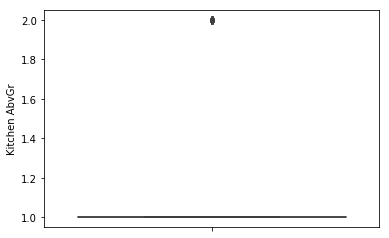

In [156]:
sns.boxplot(y='Kitchen AbvGr',data=df)

In [157]:
Q1 = df['Kitchen AbvGr'].quantile(0.25)
Q3 = df['Kitchen AbvGr'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Kitchen AbvGr'] < (Q1 - 1.5 * IQR)) | (df['Kitchen AbvGr'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

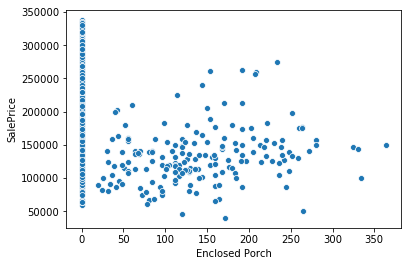

In [158]:
sns.scatterplot(x='Enclosed Porch',y='SalePrice',data=df)

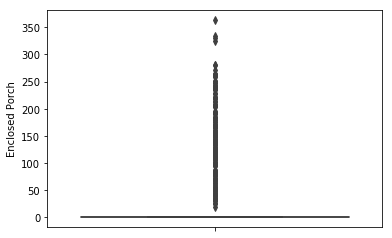

In [159]:
sns.boxplot(y='Enclosed Porch',data=df)

In [160]:
Q1 = df['Enclosed Porch'].quantile(0.25)
Q3 = df['Enclosed Porch'].quantile(0.75)

IQR = Q3-Q1

outliers = (df['Enclosed Porch'] < (Q1 - 1.5 * IQR)) | (df['Enclosed Porch'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 4 to 2929
Data columns (total 76 columns):
MS SubClass        958 non-null int64
MS Zoning          958 non-null object
Lot Frontage       958 non-null float64
Lot Area           958 non-null int64
Street             958 non-null object
Lot Shape          958 non-null object
Land Contour       958 non-null object
Utilities          958 non-null object
Lot Config         958 non-null object
Land Slope         958 non-null object
Neighborhood       958 non-null object
Condition 1        958 non-null object
Condition 2        958 non-null object
Bldg Type          958 non-null object
House Style        958 non-null object
Overall Qual       958 non-null int64
Overall Cond       958 non-null int64
Year Built         958 non-null int64
Year Remod/Add     958 non-null int64
Roof Style         958 non-null object
Roof Matl          958 non-null object
Exterior 1st       958 non-null object
Exterior 2nd       958 non-null object
Ma

In [162]:
df_test = df[['MS Zoning','Lot Frontage','Lot Area','Street','House Style','Year Built','Garage Area','Sale Condition','SalePrice']]

In [163]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 4 to 2929
Data columns (total 9 columns):
MS Zoning         958 non-null object
Lot Frontage      958 non-null float64
Lot Area          958 non-null int64
Street            958 non-null object
House Style       958 non-null object
Year Built        958 non-null int64
Garage Area       958 non-null float64
Sale Condition    958 non-null object
SalePrice         958 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 74.8+ KB


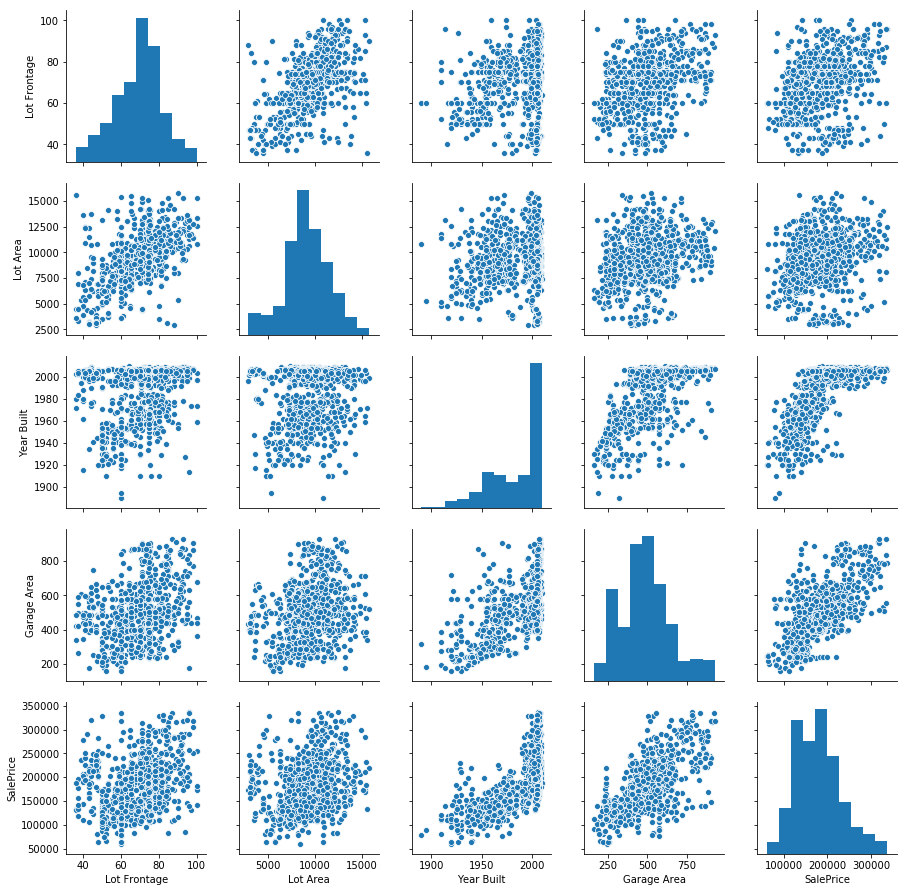

In [164]:
sns.pairplot(df_test)

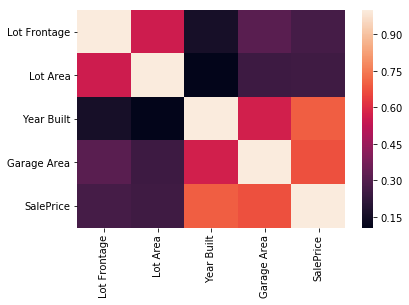

In [165]:
sns.heatmap(df_test.corr())

In [166]:
df_dummy = pd.get_dummies(df_test[['MS Zoning','Street','House Style','Sale Condition']],drop_first=True)

In [167]:
df_dummy.head(4)

,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,House Style_1.5Unf,House Style_1Story,House Style_2Story,House Style_SFoyer,House Style_SLvl,Sale Condition_AdjLand,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
4,0,0,1,0,0,0,1,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,0,1,0
8,0,0,1,0,0,1,0,0,0,0,0,1,0
9,0,0,1,0,0,0,1,0,0,0,0,1,0


In [168]:
df_final = df_test.drop(['MS Zoning','Street','House Style','Sale Condition'],axis=1)

In [169]:
df = pd.concat([df_final,df_dummy],axis=1)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 4 to 2929
Data columns (total 18 columns):
Lot Frontage              958 non-null float64
Lot Area                  958 non-null int64
Year Built                958 non-null int64
Garage Area               958 non-null float64
SalePrice                 958 non-null int64
MS Zoning_FV              958 non-null uint8
MS Zoning_RH              958 non-null uint8
MS Zoning_RL              958 non-null uint8
MS Zoning_RM              958 non-null uint8
House Style_1.5Unf        958 non-null uint8
House Style_1Story        958 non-null uint8
House Style_2Story        958 non-null uint8
House Style_SFoyer        958 non-null uint8
House Style_SLvl          958 non-null uint8
Sale Condition_AdjLand    958 non-null uint8
Sale Condition_Family     958 non-null uint8
Sale Condition_Normal     958 non-null uint8
Sale Condition_Partial    958 non-null uint8
dtypes: float64(2), int64(3), uint8(13)
memory usage: 97.1 KB


In [171]:
df = df.astype(float)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 4 to 2929
Data columns (total 18 columns):
Lot Frontage              958 non-null float64
Lot Area                  958 non-null float64
Year Built                958 non-null float64
Garage Area               958 non-null float64
SalePrice                 958 non-null float64
MS Zoning_FV              958 non-null float64
MS Zoning_RH              958 non-null float64
MS Zoning_RL              958 non-null float64
MS Zoning_RM              958 non-null float64
House Style_1.5Unf        958 non-null float64
House Style_1Story        958 non-null float64
House Style_2Story        958 non-null float64
House Style_SFoyer        958 non-null float64
House Style_SLvl          958 non-null float64
Sale Condition_AdjLand    958 non-null float64
Sale Condition_Family     958 non-null float64
Sale Condition_Normal     958 non-null float64
Sale Condition_Partial    958 non-null float64
dtypes: float64(18)
memory usage: 182.2 KB


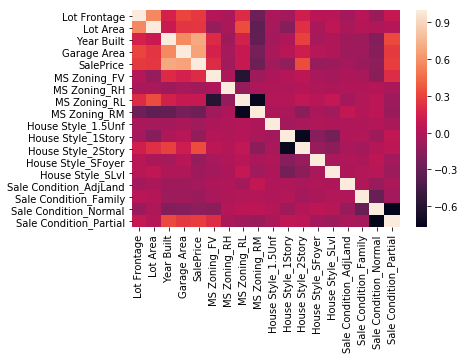

In [173]:
sns.heatmap(df.corr())

In [174]:
x = df.drop('SalePrice',axis=1)

In [175]:
y = df['SalePrice']

In [176]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [177]:
lm = LinearRegression()

In [178]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
print(lm.intercept_)

-1612330.0112


In [180]:
lm.coef_

array([  4.01278174e+01,   7.23151291e-01,   8.65923430e+02,
         1.40132451e+02,   2.55402723e+04,  -1.16867419e+04,
         1.09389126e+04,  -8.81060514e+02,  -1.45519152e-11,
        -2.56832297e+04,  -9.43358310e+03,  -5.11734508e+04,
        -4.09660646e+04,   2.18658058e+04,  -7.69388633e+03,
         6.17955611e+03,   1.06702950e+04])

In [181]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['coeff'])

In [182]:
cdf

,coeff
Lot Frontage,4.012782e+01
Lot Area,7.231513e-01
Year Built,8.659234e+02
Garage Area,1.401325e+02
MS Zoning_FV,2.554027e+04
MS Zoning_RH,-1.168674e+04
MS Zoning_RL,1.093891e+04
MS Zoning_RM,-8.810605e+02
House Style_1.5Unf,-1.455192e-11
House Style_1Story,-2.568323e+04


In [183]:
predictions = lm.predict(x_test)

In [184]:
predictions

array([ 225192.28701644,  252905.68077241,  164136.81847869,
        169238.12393171,  229200.84701306,  123968.78287357,
        146138.16324022,  189139.0333476 ,  190037.59920377,
        201503.52977366,  143632.7499668 ,  171178.58501067,
        216280.56742145,  243273.07446242,  143229.04324041,
        180562.75216196,  157767.66976741,  220570.53178163,
        169051.40090015,  242724.76987318,  191129.83332272,
        187776.37365197,  235104.28968577,  199648.28165838,
        264018.37571804,  199196.84584858,  168250.87353266,
        194644.25995741,  224658.23257967,  132850.39981095,
        174940.85170098,  239151.57798158,  236153.86535382,
        143848.89065165,  154677.83382525,  208093.12833789,
        110555.97013867,  192579.62140773,  216407.16931189,
        128832.60679567,  123643.74210918,  245540.16833523,
        198697.21978507,  137850.31521363,  185332.9039124 ,
        144241.29858   ,  167514.67819407,  151535.49512875,
        166935.43364358,

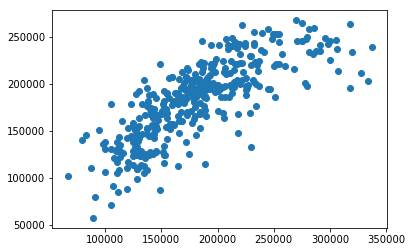

In [185]:
plt.scatter(y_test,predictions)

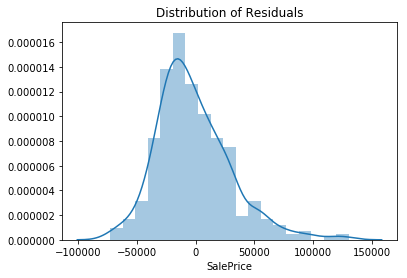

In [186]:
sns.distplot((y_test-predictions))
plt.title('Distribution of Residuals')

In [187]:
print('MAE =', metrics.mean_absolute_error(y_test,predictions))
print('MSE =', metrics.mean_squared_error(y_test,predictions))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE = 24497.6010242
MSE = 1007280259.78
RMSE = 31737.6788657


In [188]:
from sklearn.metrics import r2_score
# Calculate the R² score
r2_score = r2_score(y_test, predictions)

# Print the R² score
print("R² score:", r2_score)

R² score: 0.617140811686


In [189]:
import pickle

In [191]:
#Save the model
pickle.dump(lm,open('House_prediction.pkl','wb'))